In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
file_path = "/content/AB_NYC_2019.csv"
df = pd.read_csv(file_path)

In [82]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [83]:
df.shape

(48895, 16)

In [84]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [86]:
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [87]:
(df.isnull().sum() / df.shape[0]) *100

,0
id,0.000000
name,0.032723
host_id,0.000000
host_name,0.042949
neighbourhood_group,0.000000
neighbourhood,0.000000
latitude,0.000000
longitude,0.000000
room_type,0.000000
price,0.000000


In [88]:
print("Total Duplicates:", df.duplicated().sum())

Total Duplicates: 0


In [89]:
# For numeric columns fill missing value with median
for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].median())

In [90]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [91]:
#check all the missing values are filled`
df.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [92]:
# 3. Standardization
df.columns = df.columns.str.lower().str.replace(" ", "_")
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower()

In [93]:
# 4. Outlier Detection
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['price'] > 0) & (df['price'] < 1000)]

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48586 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48586 non-null  int64  
 1   name                            48586 non-null  object 
 2   host_id                         48586 non-null  int64  
 3   host_name                       48586 non-null  object 
 4   neighbourhood_group             48586 non-null  object 
 5   neighbourhood                   48586 non-null  object 
 6   latitude                        48586 non-null  float64
 7   longitude                       48586 non-null  float64
 8   room_type                       48586 non-null  object 
 9   price                           48586 non-null  int64  
 10  minimum_nights                  48586 non-null  int64  
 11  number_of_reviews               48586 non-null  int64  
 12  last_review                     48586

In [95]:
# Show summary statistics
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.858600e+04,4.858600e+04,48586.000000,48586.000000,48586.000000,48586.000000,48586.000000,48586.000000,48586.000000,48586.000000
mean,1.902135e+07,6.763733e+07,40.728927,-73.952031,140.269049,6.974931,23.372803,1.241874,7.168670,112.365928
std,1.097890e+07,7.860718e+07,0.054580,0.046156,112.899316,20.276877,44.651661,1.524010,33.046098,131.383634
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.476410e+06,7.831209e+06,40.690002,-73.982950,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,1.967620e+07,3.084879e+07,40.722960,-73.955580,105.000000,3.000000,5.000000,0.720000,1.000000,44.000000
75%,2.914903e+07,1.074344e+08,40.763130,-73.936100,175.000000,5.000000,24.000000,1.600000,2.000000,225.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,999.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Text(0.5, 1.0, 'Boxplot of Price after Outlier Handling')

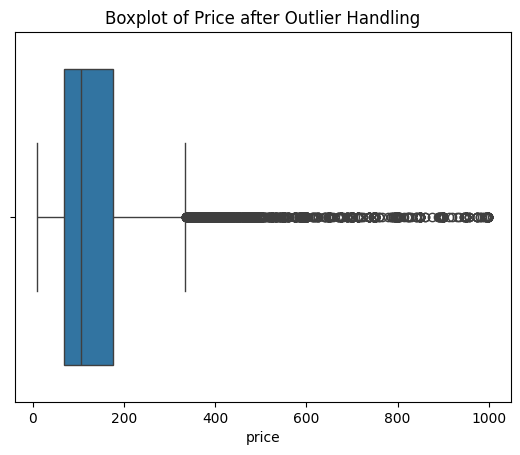

In [96]:
# Boxplot for price after cleaning
sns.boxplot(x=df['price'])
plt.title("Boxplot of Price after Outlier Handling")